## **Chapter 13. 선형회귀**

**13.1 직선 학습하기**


특성과 타깃 벡터 사이의 선형 관계를 표현하는 모델을 훈련하고 싶다.

-> 선형 회귀 사용. (사이킷런의 LinearRegression)


* 선형회귀 모델 만드는 LinearRegression()
* 선형회귀 모델 훈련하는 fit(features, target)
** 특성과 타깃 벡터 사이의 관계가 선형


In [ ]:
# 라이브러리를 임포트
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# 데이터를 로드하고 두 개의 특성만 선택합니다
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# 선형 회귀 모델을 만듭니다.
regression = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
model = regression.fit(features, target)

In [ ]:
# 절편을 확인합니다.
model.intercept_

22.485628113468223

In [ ]:
# 특성의 계수를 확인합니다.
model.coef_

array([-0.35207832,  0.11610909])

In [ ]:
# 타깃 벡터의 첫 번째 값에 1000을 곱합니다.
target[0]*1000

24000.0

In [ ]:
# 첫 번째 샘플의 타깃값을 예측하고 1000을 곱합니다.
model.predict(features)[0]*1000

24573.366631705547

In [ ]:
# 첫 번째 계수에 1000을 곱합니다.
model.coef_[0]*1000

-352.07831564026765

In [ ]:
regression is model

True

In [ ]:
# 모델 형성, 훈련, 예측 과정을 한번에 할 수 있다
LinearRegression().fit(features,target).predict(features)[0]*1000

24573.366631705547

**13.2 교차 특성 다루기**

타깃 변수에 영향을 미치면서 다른 특성에 의존하는 특성이 있다.
-> 사이킷런의 PolynomialFeatures 클래스로 교차항을 만들어 의존성을 잡아냅니다.


# PolynomialFeatures

-특성의 모든 조합에 대한 교차항을 만들어 줌

-교차항 설정 시 지정해야 하는 세 개의 매개변수

1. interaction_only = True
	* PolynomialFeatures가 오직 교차항만 반환 (교호작용만 분석하고 싶을 때)
  * xy, xyz..
2. Include_bias=False
	* default 가 true, 기본적으로 bias를 1로 채워진 특성(절편)을 추가 - 편향을 위한 변수 X0=1
3. degree
	* 교차항을 만들  최대 특성의 수를 결정
	* 다항 특성을 위한 최대 타수를 결정. e) degree=3은 x^2과 x^3항을 만듬
  - > 모든 조합에 대한 교차항 만듬


In [ ]:
# 라이브러리 임포트
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

# 데이터를 로드하고 두 개의 특성만 선택
boston = load_boston()
featrues = boston.data[:,0:2]
target=boston.target

# 교차항 만듬
interaction = PolynomialFeatures( degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)

# 선형 회귀 모델을 만듬
regression = LinearRegression()

# 선형 회귀 모델을 훈련
model = regression.fit(features_interaction, target)

In [ ]:
# 첫 번째 샘플의 특성값 확인
features[0]

array([6.32e-03, 1.80e+01])

In [ ]:
#모든 샘플에서 이 두 값을 곱해 교차항을 만듬

# 라이브러리 임포트
import numpy as np

# 각 샘플에서 첫 번째와 두 번째 특성을 곱함
interaction_term = np.multiply(features[:,0], features[:,1])

In [ ]:
# 첫 번째 샘플의 교차항 확인
interaction_term[0]

0.11376

In [ ]:
# 첫 번째 샘플의 값 확인
features_interaction[0]

array([6.3200e-03, 1.8000e+01, 1.1376e-01])

**13.3 비선형 관계 학습**

비선형 관계를 모델링하고 싶다
-> 선형 회귀 모델에 다항 특성을 추가하여 다항회귀를 만듬

In [ ]:
# 라이브러리를 임포트
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

# 데이터를 로드하고 하나의 특성을 선택
boston=load_boston()
features=boston.data[:,0:1]
target=boston.target

# 다항 특성 x^2와 x^3을 만듬
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)

# 선형 회귀 모델을 만듬
regression = LinearRegression()

# 선형 회귀 모델을 훈련함
model = regression.fit(features_polynomial, target)

In [ ]:
# 첫 번째 샘플 확인
features[0]

array([0.00632])

In [ ]:
# 첫 번째 샘플을 x^2로 거듭제곱함
features[0]**2

array([3.99424e-05])

In [ ]:
# 첫 번째 샘플을 x^2로 세제곱함
features[0]**3

array([2.52435968e-07])

In [ ]:
# 첫 번째 샘플의 x, x^2, x^3 값을 확인
features_polynomial[0]

array([6.32000000e-03, 3.99424000e-05, 2.52435968e-07])

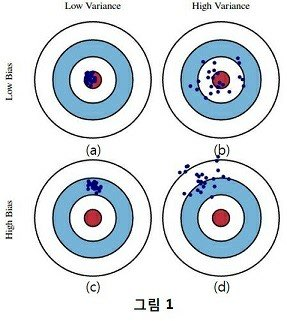

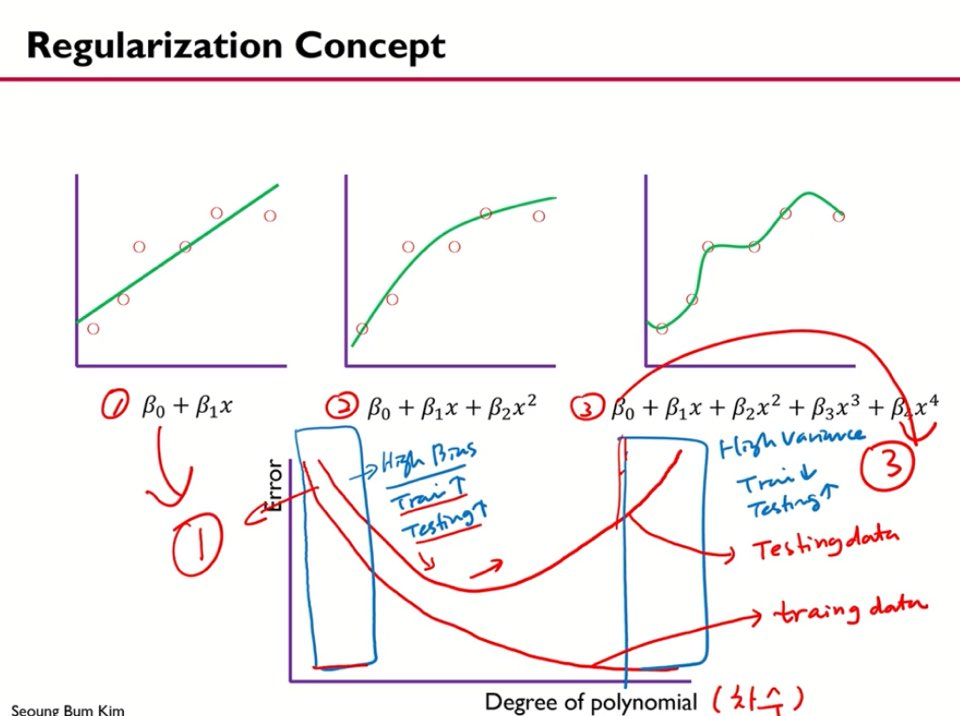

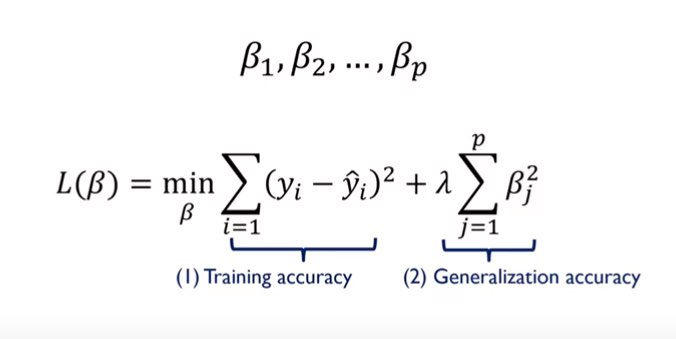

**13.4 규제로 분산 줄이기**

선형 회귀의 분산 줄이기
-> 리지 회귀나 라소 회귀와 같이 축소 페널티(규제, regularization)가 포함된 학습 알고리즘 사용

In [ ]:
# 라이브러리 임포트
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# 데이터 로드
boston=load_boston()
features=boston.data
target=boston.target

# 특성 표준화
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# alpha 값을 지정한 리지 회귀를 만듬
regression = Ridge(alpha=0.5)

# 선형 회귀 모델 훈련
model = regression.fit(features_standardized, target)

사이킷런의 RidgeCV 클래스를 사용하면 좋은 alpha 값을 선택할 수 있습니다.

In [ ]:
# 라이브러리 임포트
from sklearn.linear_model import RidgeCV

# 세 개의 alpha 값에 대한 리지 회귀를 만듬
regr_cv = RidgeCV(alphas=[0.1,1.0,10.0])

# 선형 회귀 모델을 훈련
model_cv=regr_cv.fit(features_standardized, target)

# 계수 확인
model_cv.coef_

array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

In [ ]:
# alpha 값 확인
model_cv.alpha_

1.0

RidgeCV 클래스의 cv 매개변수를 사용해 교차검증 방식을 지정할 수 있다

In [ ]:
# 5-폴드 교차검증을 사용하여 리지 회귀를 만듬
regr_cv=RidgeCV(alphas=[0.1,1.0,10.0],cv=5)

# 선형 회귀 모델을 훈련
model_cv=regr_cv.fit(features_standardized,target)

# alpha 값 확인
model_cv.alpha_

10.0

**13.5 라소 회귀로 특성 줄이기**

특성의 수를 줄여서 선형 회귀 모델을 단순하게 만들고 싶음
-> 라소 회귀 사용

In [ ]:
# 라이브러리 임포트
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# 데이터 로드
boston=load_boston()
features=boston.data
target=boston.target

# 특성 표준화
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# alpha 값을 지정한 리지 회귀를 만듬
regression = Lasso(alpha=0.5)

# 선형 회귀 모델 훈련
model = regression.fit(features_standardized, target)

In [ ]:
# 계수를 확인
model.coef_

array([-0.11526463,  0.        , -0.        ,  0.39707879, -0.        ,
        2.97425861, -0.        , -0.17056942, -0.        , -0.        ,
       -1.59844856,  0.54313871, -3.66614361])

In [ ]:
# 큰 alpha 값을 지정한 라소 회귀 만듬
regression_a10=Lasso(alpha=10)
model_a10=regression_a10.fit(features_standardized,target)
model_a10.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

LassoCV 클래스를 사용해 라소의 alpha 값을 찾을 수 있다.
LassoCV의 cv 매개변수 기본값은 3으로 3-폴드 교차검증 사용

In [ ]:
# 라이브러리를 임포트
from sklearn.linear_model import LassoCV

# 세 개의 alpha 값에 대한 라소 회귀를 만듬
lasso_cv = LassoCV(alphas=[0.1,1.0,10.0], cv=5)

# 선형 회귀 모델 훈련
model_cv = lasso_cv.fit(features_standardized, target)

# 계수 확인
model_cv.coef_

array([-0.63230364,  0.70840931, -0.        ,  0.65760723, -1.57419335,
        2.82626903, -0.        , -2.42207901,  1.19593681, -0.84646778,
       -1.92249345,  0.76216539, -3.72618383])

In [ ]:
# alpha 값을 확인
model_cv.alpha_

0.1

LassoCV는 n_alphas 매개변수를 사용해 자동으로 탐색 대상 값 생성 가능; 
기본값-100

In [ ]:
# 1000개의 alpha 값을 탐색하는 라소 회귀 만듬
lasso_cv = LassoCV(n_alphas=1000,cv=5)

# 선형 회귀 모델 훈련
model_cv = lasso_cv.fit(features_standardized, target)

# 계수 확인
model_cv.alpha_

0.15326173083090813